In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import configs
import os
from auxrl.Agent import Agent
from auxrl.networks.Network import Network
import yaml

from acme import specs

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
if os.environ['LOGNAME'] == 'chingfang':
    engram_dir = '/Volumes/aronov-locker/Ching/rl/'
else:
    engram_dir = '/mnt/smb/locker/aronov-locker/Ching/rl/'

In [4]:
engram_dir = '../scripts/'

# Foraging

In [ ]:
from auxrl.environments.GridWorld import Env as Env 

In [ ]:
dim = 16
nn_yaml = 'dm'
base_exp = 'tmp'
exp = f'{base_exp}_{nn_yaml}_dim{dim}'
fname = f'{base_exp}_mf'
_iter = 0

In [ ]:
fname_nnet_dir = f'{engram_dir}nnets/{exp}/{fname}_{_iter}/'

In [ ]:
with open(f'{engram_dir}params/{exp}/{fname}.yaml', 'r') as f:
    parameters = yaml.safe_load(f)

In [ ]:
parameters['fname'] = f'{exp}/{fname}_{_iter}'
parameters['internal_dim'] = dim
parameters['nn_yaml'] = nn_yaml

In [ ]:
env = Env(**parameters['dset_args'])

In [ ]:
env_spec = specs.make_environment_spec(env)
network = Network(env_spec, device=device, **parameters['network_args'])
agent = Agent(env_spec, network, device=device, **parameters['agent_args'])

In [ ]:
with open(f'{fname_nnet_dir}goal.txt', 'r') as f:
    goal_state = f.read()
    print(goal_state)
goal_state = (int(goal_state[1]), int(goal_state[-2]))

In [ ]:
env.goal_state = goal_state

In [ ]:
agent.load_network(fname_nnet_dir, episode=200, encoder_only=False)

In [ ]:
from auxrl.utils import run_eval_episode

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%matplotlib inline
env._start_state = env._sample_start()
score, steps_per_episode = run_eval_episode(env, agent, 1, verbose=True)

# Linear Track

In [ ]:
from auxrl.environments.LinearTrack import Env as Env 

In [ ]:
dim = 16
nn_yaml = 'dm'
base_exp = 'lineartrack'
model = 'g0_-2_entro-2'
_iter = 0
epoch = 200
exp = f'{base_exp}_{nn_yaml}_dim{dim}'
fname = f'{base_exp}_{model}'

In [ ]:
fname_nnet_dir = f'{engram_dir}nnets/{exp}/{fname}_{_iter}/'

In [ ]:
with open(f'{engram_dir}params/{exp}/{fname}.yaml', 'r') as f:
    parameters = yaml.safe_load(f)

In [ ]:
parameters['fname'] = f'{exp}/{fname}_{_iter}'
parameters['internal_dim'] = dim
parameters['nn_yaml'] = nn_yaml

In [ ]:
env = Env(**parameters['dset_args'])

In [ ]:
env_spec = specs.make_environment_spec(env)
network = Network(env_spec, device=device, **parameters['network_args'])
agent = Agent(env_spec, network, device=device, **parameters['agent_args'])

In [ ]:
with open(f'{fname_nnet_dir}goal.txt', 'r') as f:
    goal_state = f.read()
    print(goal_state)
goal_state = (int(goal_state[1]), int(goal_state[-2]))

In [ ]:
agent.load_network(fname_nnet_dir, episode=epoch, encoder_only=False)

In [ ]:
from auxrl.utils import run_eval_episode

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%matplotlib inline
env._start_state = env._sample_start()
score, steps_per_episode = run_eval_episode(env, agent, 1, verbose=True)

# Alternating T Maze

In [5]:
from auxrl.environments.AlternatingT import Env as Env 

In [6]:
dim = 64
nn_yaml = 'dm_small_encoder_large_q'
base_exp = 'altT_eps0.4_mlen0_g0_tcm5_g0.9'
exp = f'{base_exp}_{nn_yaml}_dim{dim}'
fname = f'{base_exp}_mf0'
_iter = 0

In [7]:
fname_nnet_dir = f'{engram_dir}nnets/{exp}/{fname}_{_iter}/'

In [8]:
with open(f'{engram_dir}params/{exp}/{fname}.yaml', 'r') as f:
    parameters = yaml.safe_load(f)

In [9]:
parameters['fname'] = f'{exp}/{fname}_{_iter}'
parameters['internal_dim'] = dim
parameters['nn_yaml'] = nn_yaml

In [10]:
env = Env(**parameters['dset_args'])

In [11]:
env_spec = specs.make_environment_spec(env)
network = Network(env_spec, device=device, **parameters['network_args'])
agent = Agent(env_spec, network, device=device, **parameters['agent_args'])

In [12]:
agent.load_network(fname_nnet_dir, episode=60, encoder_only=False)

In [13]:
from auxrl.utils import run_eval_episode

In [14]:
import warnings
warnings.filterwarnings("ignore")

tensor([3.1498, 3.3286, 3.2831, 4.8642])


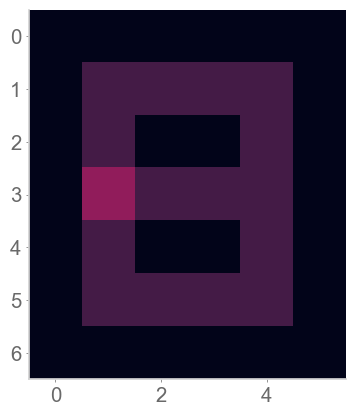

tensor([4.1186, 4.1732, 4.6113, 6.2789])


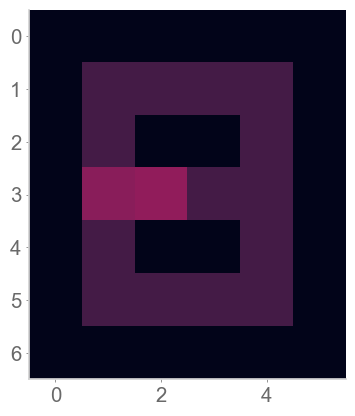

tensor([4.2281, 4.3532, 4.6147, 6.8749])


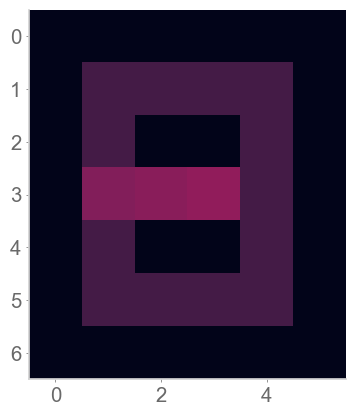

tensor([6.4291, 7.3171, 5.0110, 4.5087])


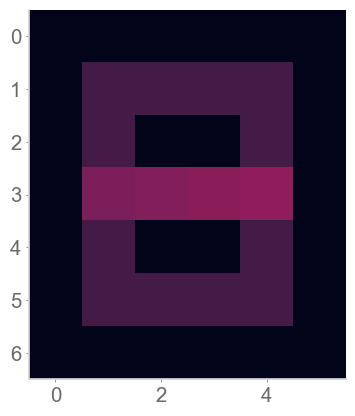

tensor([ 6.9806, 10.0648,  7.1919,  6.9993])


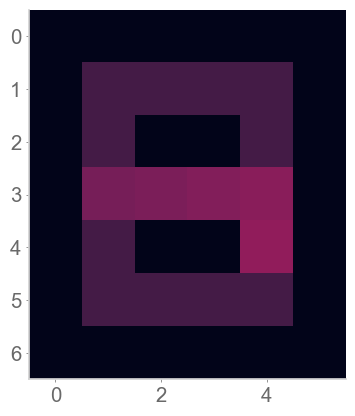

tensor([5.3607, 4.9912, 6.4333, 5.2737])


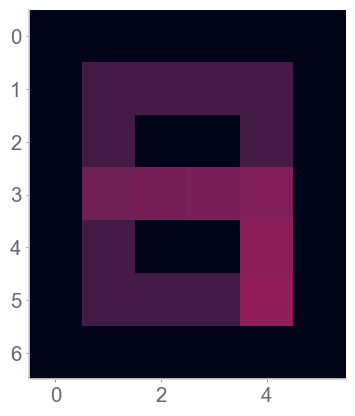

tensor([5.1568, 5.2613, 6.6325, 6.0556])


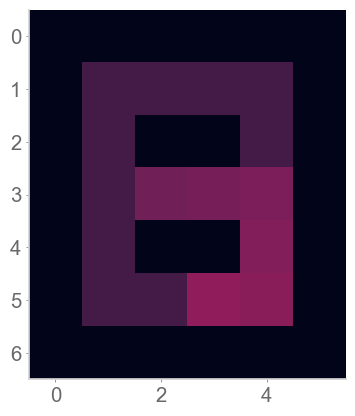

tensor([5.7495, 5.5316, 7.9015, 6.1322])


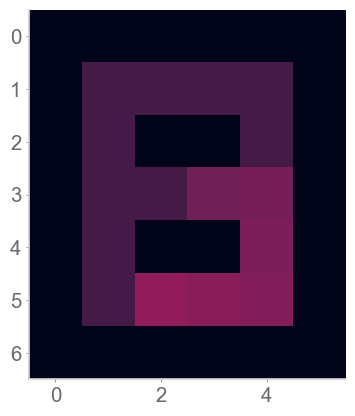

tensor([8.5263, 6.2481, 6.5372, 6.1683])


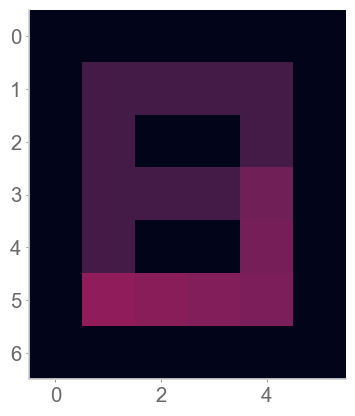

tensor([10.1136,  7.3704,  7.4804,  7.4879])


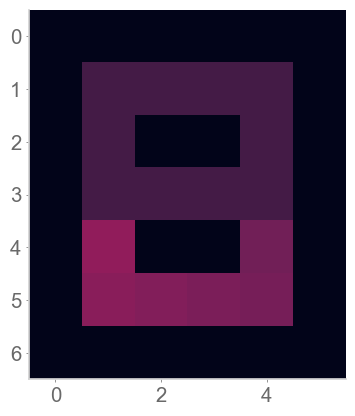

tensor([3.2228, 3.2846, 3.3150, 6.5649])


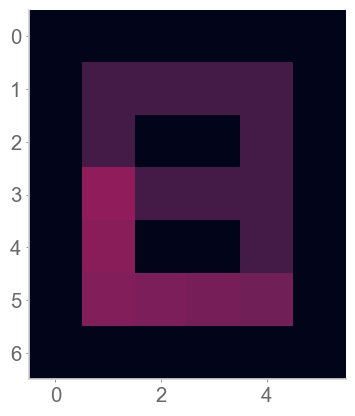

tensor([4.1253, 4.1392, 4.5059, 6.7511])


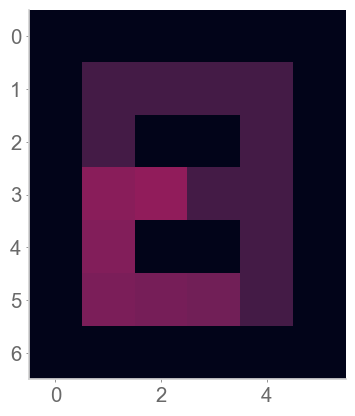

tensor([4.2524, 4.2529, 4.7307, 7.5014])


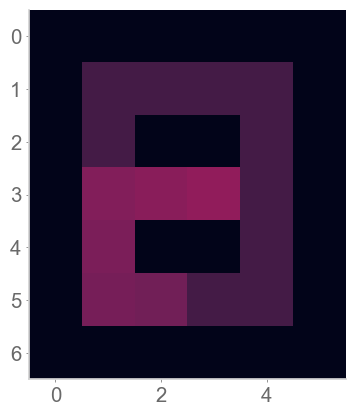

tensor([7.4335, 6.4867, 5.1881, 4.9271])


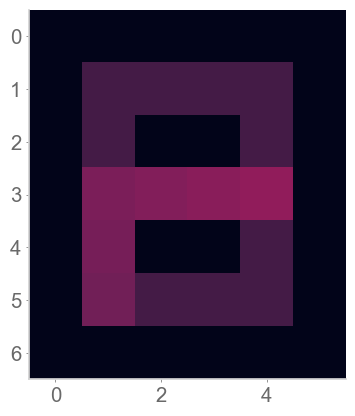

tensor([8.2215, 6.0798, 5.7496, 5.3458])


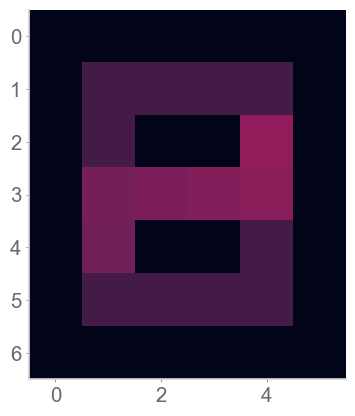

Left reward
tensor([4.9141, 5.6812, 5.8774, 4.9041])


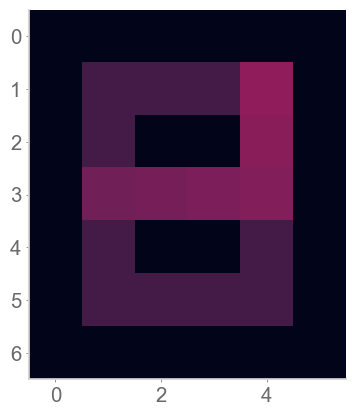

tensor([5.0774, 4.9837, 6.7883, 5.5513])


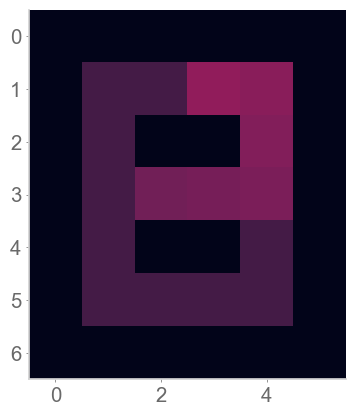

tensor([5.6913, 5.7594, 7.3883, 6.2998])


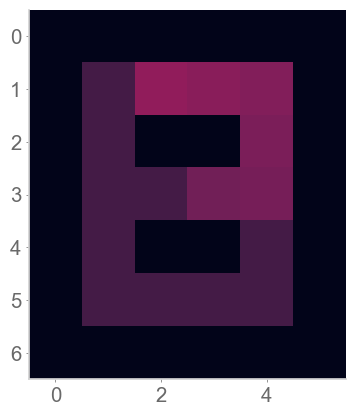

tensor([5.7420, 7.7425, 6.0347, 5.9685])


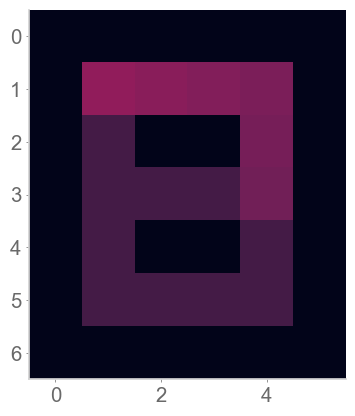

tensor([7.2992, 9.0040, 7.1879, 7.0546])


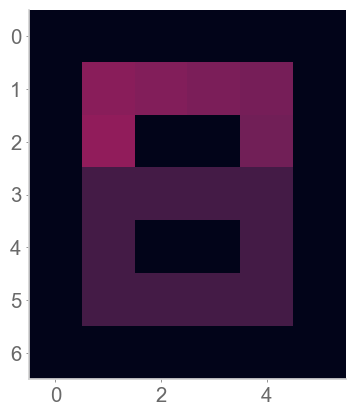

Reset reward
tensor([3.1234, 3.1475, 3.1600, 6.8984])


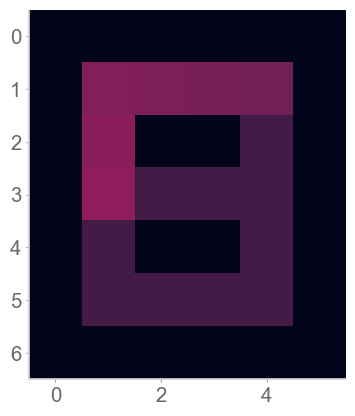

tensor([4.1563, 4.1563, 4.6304, 6.7753])


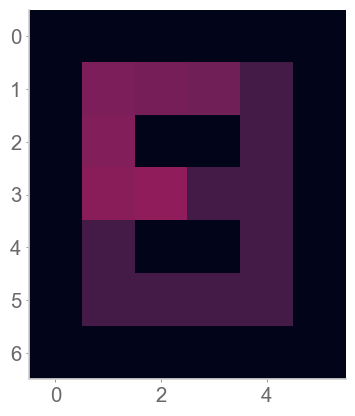

tensor([4.2581, 4.1786, 4.7317, 7.8234])


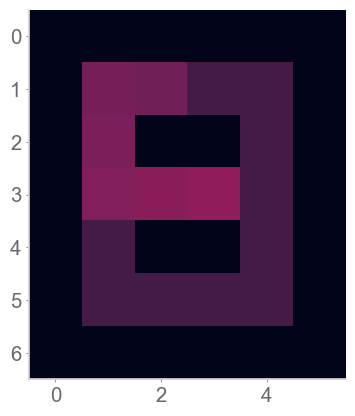

tensor([6.0802, 8.8742, 5.2470, 5.3141])


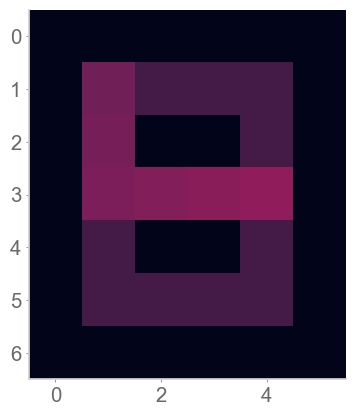

tensor([ 6.4417, 10.8409,  6.7730,  6.8995])


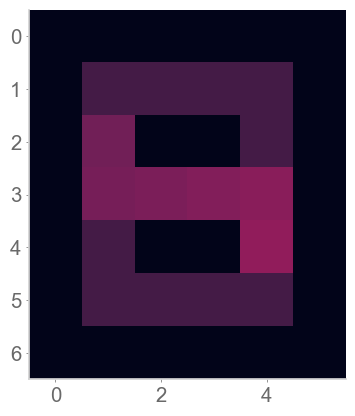

Right reward
tensor([5.3607, 4.9912, 6.4333, 5.2737])


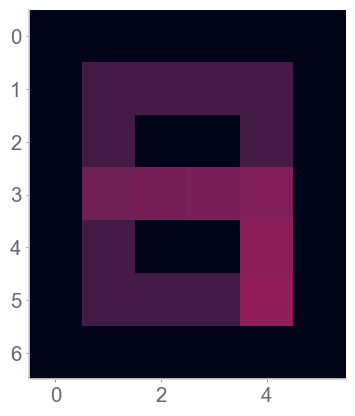

tensor([5.1568, 5.2613, 6.6325, 6.0556])


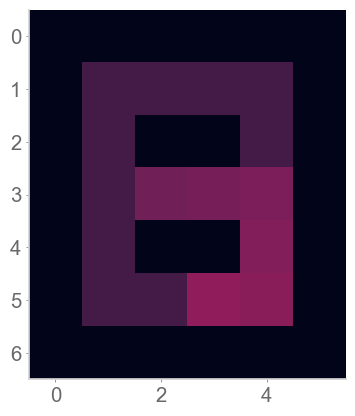

tensor([5.7495, 5.5316, 7.9015, 6.1322])


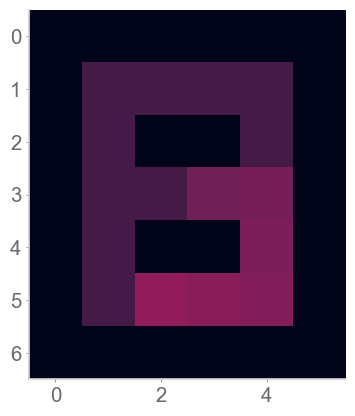

tensor([8.5263, 6.2481, 6.5372, 6.1683])


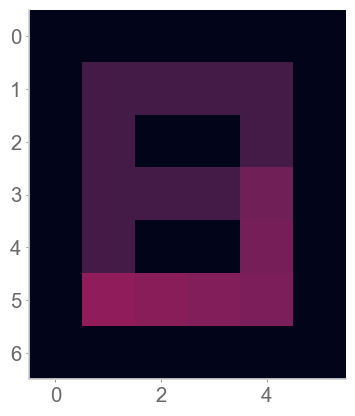

tensor([10.1136,  7.3704,  7.4804,  7.4879])


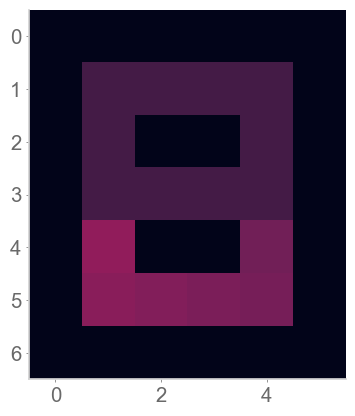

Reset reward
tensor([3.2228, 3.2846, 3.3150, 6.5649])


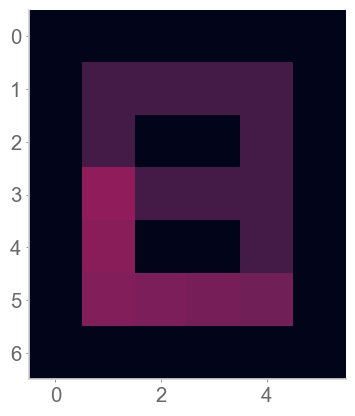

tensor([4.1253, 4.1392, 4.5059, 6.7511])


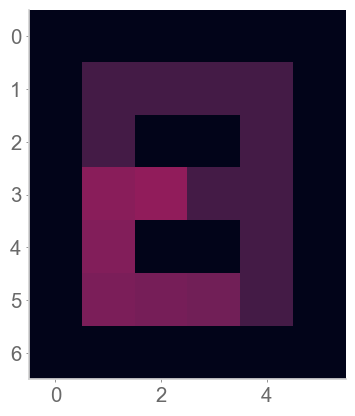

tensor([4.2524, 4.2529, 4.7307, 7.5014])


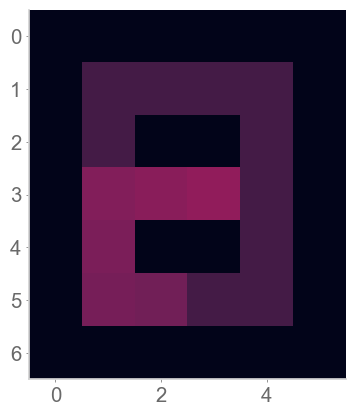

tensor([7.4335, 6.4867, 5.1881, 4.9271])


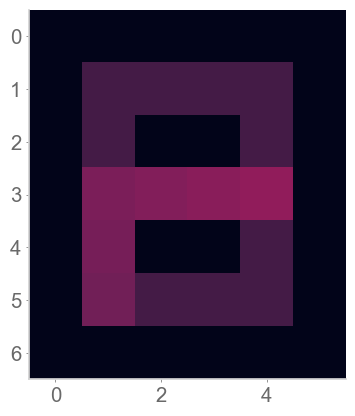

tensor([8.2215, 6.0798, 5.7496, 5.3458])


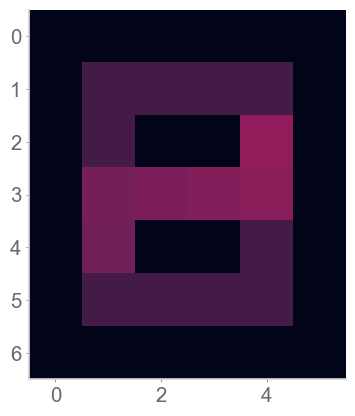

Left reward
tensor([4.9141, 5.6812, 5.8774, 4.9041])


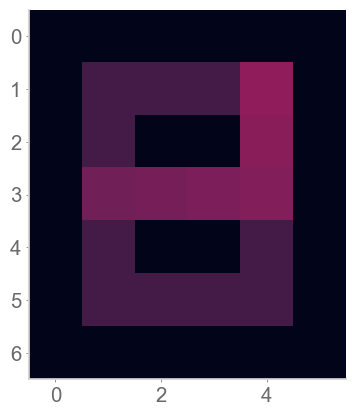

tensor([5.0774, 4.9837, 6.7883, 5.5513])


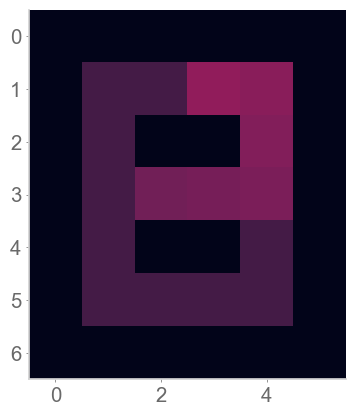

tensor([5.6913, 5.7594, 7.3883, 6.2998])


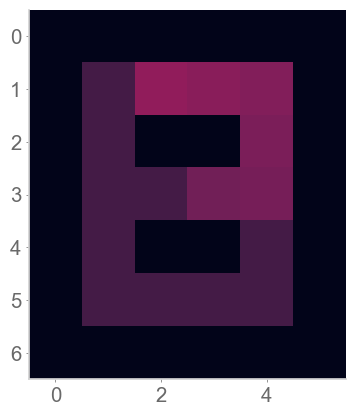

tensor([5.7420, 7.7425, 6.0347, 5.9685])


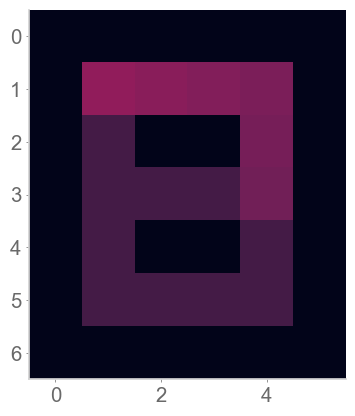

tensor([7.2992, 9.0040, 7.1879, 7.0546])


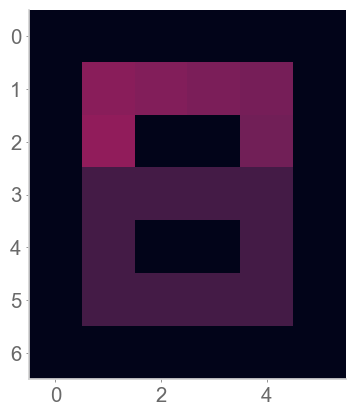

Reset reward
tensor([3.1234, 3.1475, 3.1600, 6.8984])


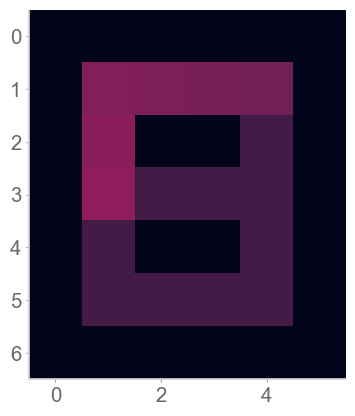

tensor([4.1563, 4.1563, 4.6304, 6.7753])


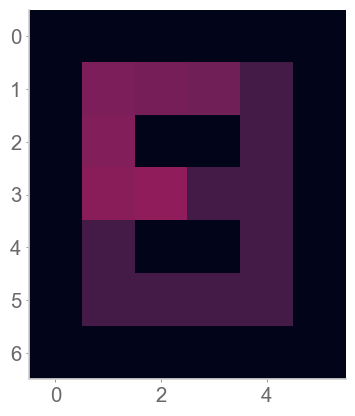

tensor([4.2581, 4.1786, 4.7317, 7.8234])


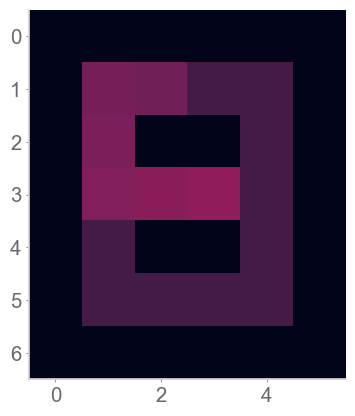

tensor([6.0802, 8.8742, 5.2470, 5.3141])


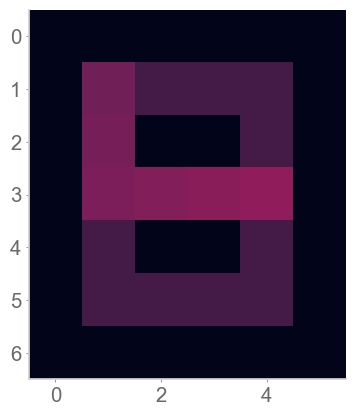

tensor([ 6.4417, 10.8409,  6.7730,  6.8995])


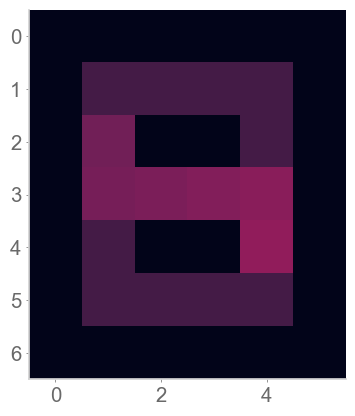

Right reward
tensor([5.3607, 4.9912, 6.4333, 5.2737])


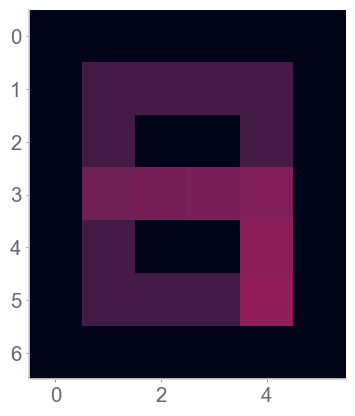

tensor([5.1568, 5.2613, 6.6325, 6.0556])


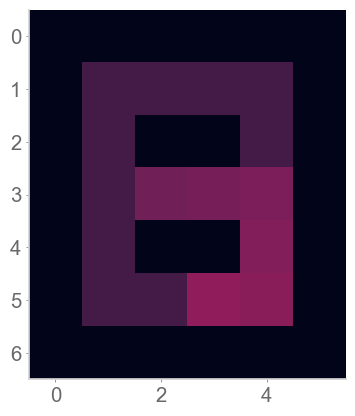

tensor([5.7495, 5.5316, 7.9015, 6.1322])


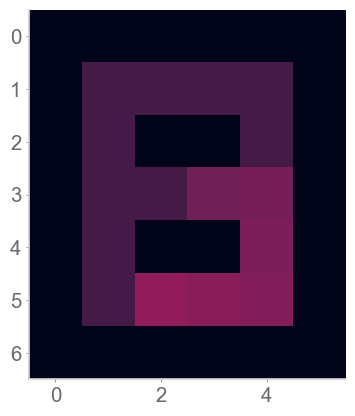

tensor([8.5263, 6.2481, 6.5372, 6.1683])


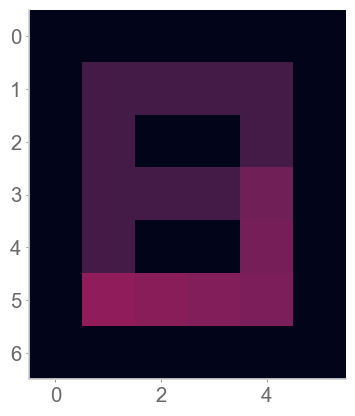

tensor([10.1136,  7.3704,  7.4804,  7.4879])


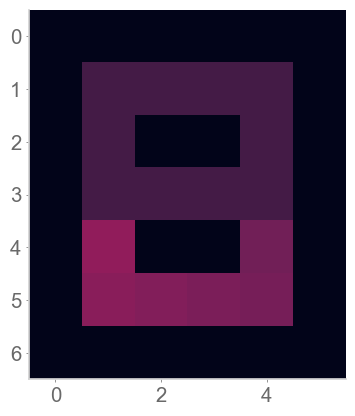

Reset reward
tensor([3.2228, 3.2846, 3.3150, 6.5649])


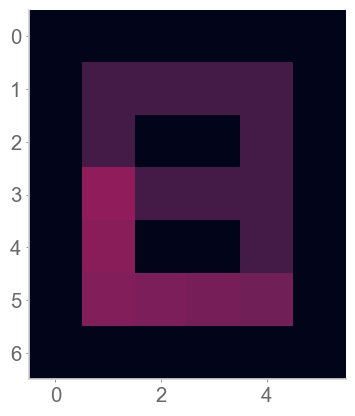

tensor([4.1253, 4.1392, 4.5059, 6.7511])


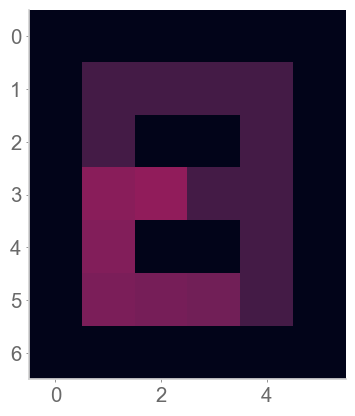

tensor([4.2524, 4.2529, 4.7307, 7.5014])


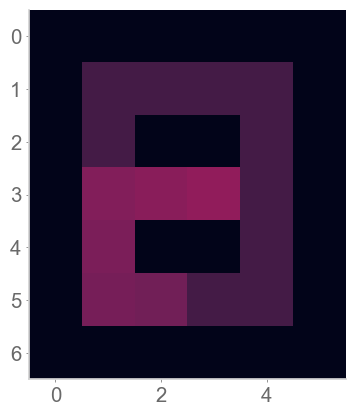

tensor([7.4335, 6.4867, 5.1881, 4.9271])


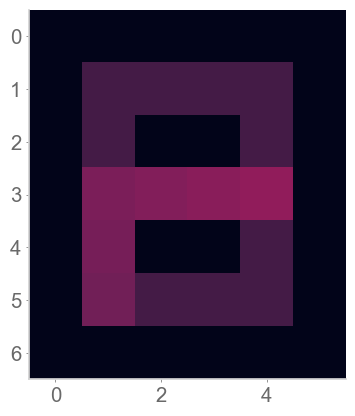

tensor([8.2215, 6.0798, 5.7496, 5.3458])


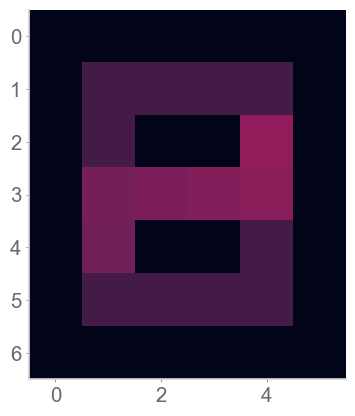

Left reward
tensor([4.9141, 5.6812, 5.8774, 4.9041])


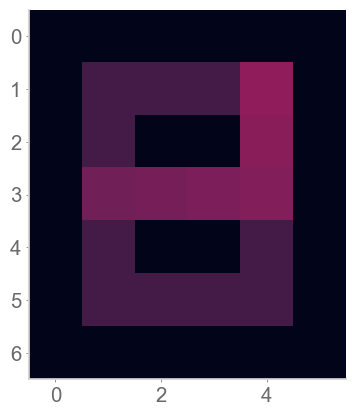

tensor([5.0774, 4.9837, 6.7883, 5.5513])


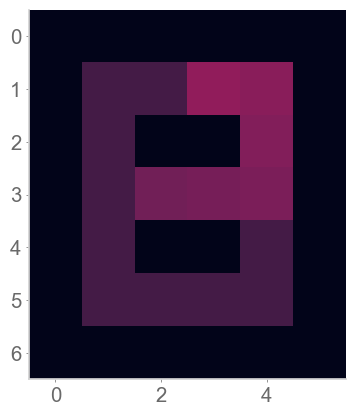

tensor([5.6913, 5.7594, 7.3883, 6.2998])


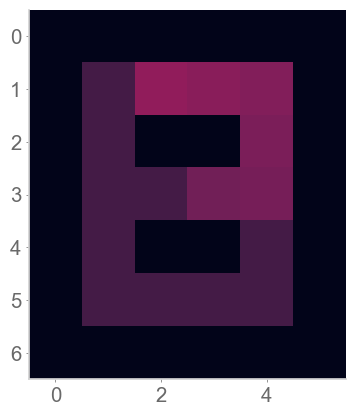

tensor([5.7420, 7.7425, 6.0347, 5.9685])


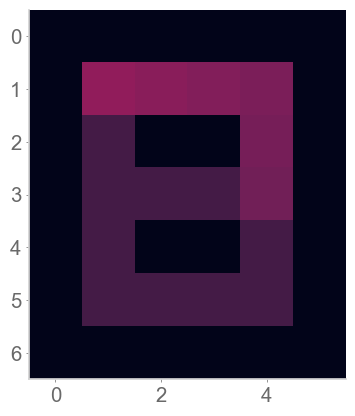

tensor([7.2992, 9.0040, 7.1879, 7.0546])


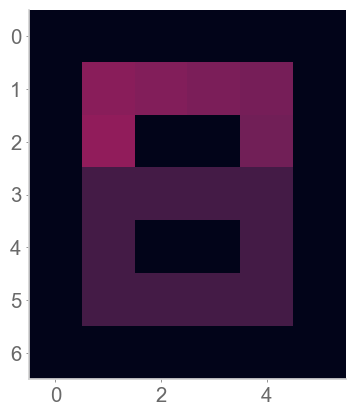

Reset reward
tensor([3.1234, 3.1475, 3.1600, 6.8984])


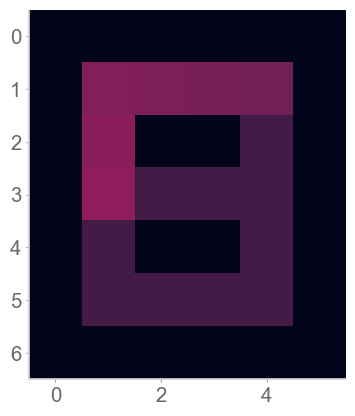

tensor([4.1563, 4.1563, 4.6304, 6.7753])


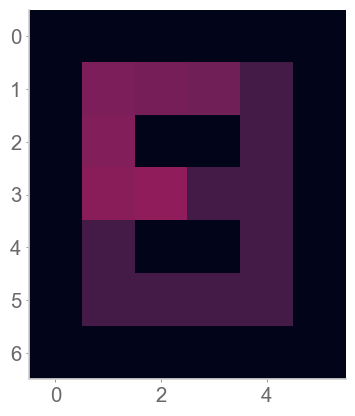

tensor([4.2581, 4.1786, 4.7317, 7.8234])


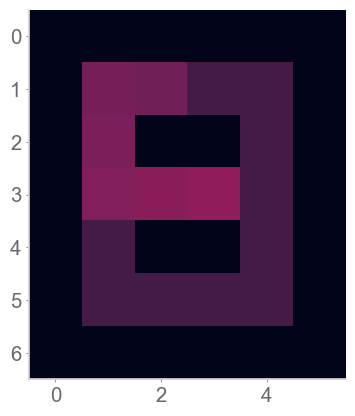

tensor([6.0802, 8.8742, 5.2470, 5.3141])


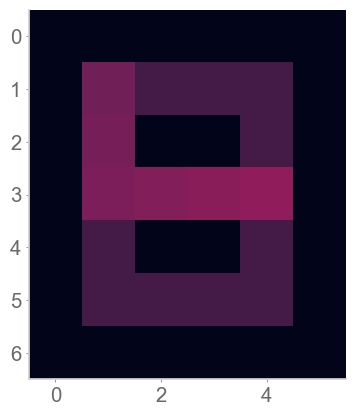

tensor([ 6.4417, 10.8409,  6.7730,  6.8995])


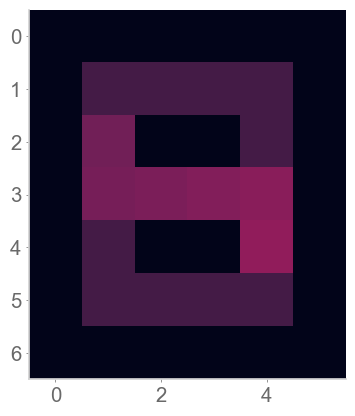

Right reward
tensor([5.3607, 4.9912, 6.4333, 5.2737])


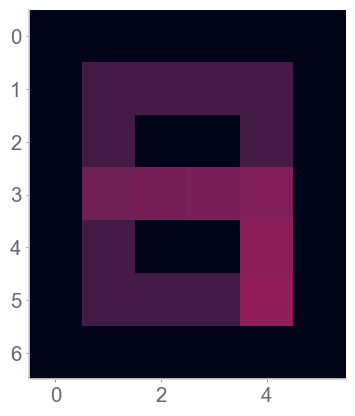

tensor([5.1568, 5.2613, 6.6325, 6.0556])


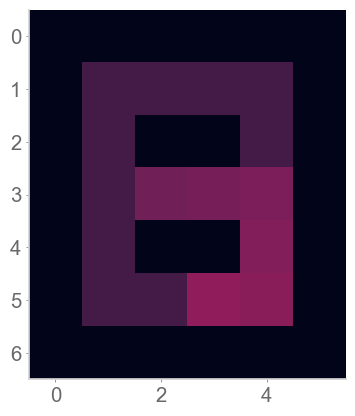

tensor([5.7495, 5.5316, 7.9015, 6.1322])


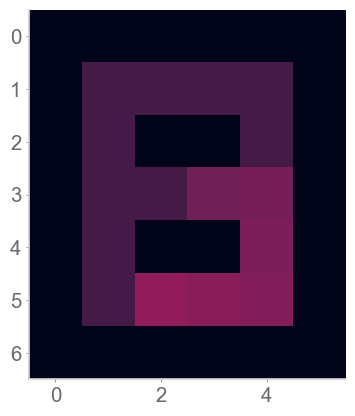

tensor([8.5263, 6.2481, 6.5372, 6.1683])


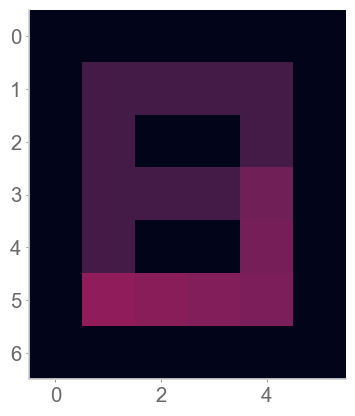

tensor([10.1136,  7.3704,  7.4804,  7.4879])


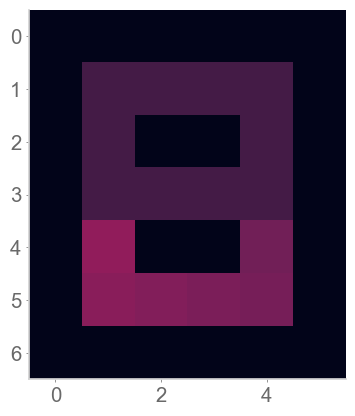

Reset reward
tensor([3.2228, 3.2846, 3.3150, 6.5649])


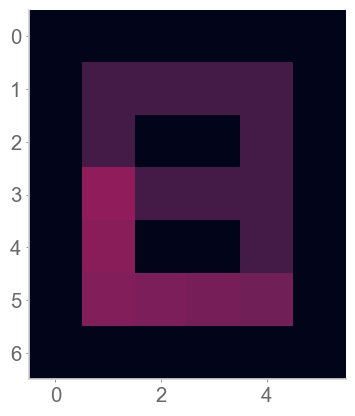

tensor([4.1253, 4.1392, 4.5059, 6.7511])


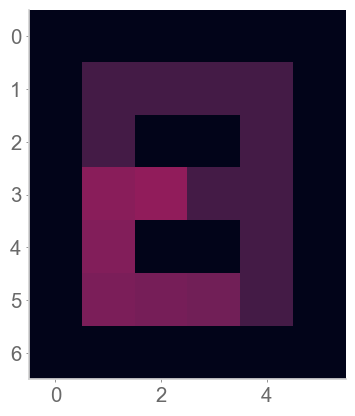

tensor([4.2524, 4.2529, 4.7307, 7.5014])


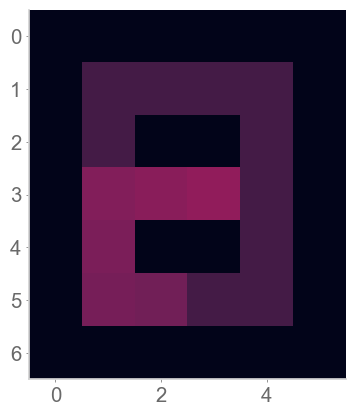

tensor([7.4335, 6.4867, 5.1881, 4.9271])


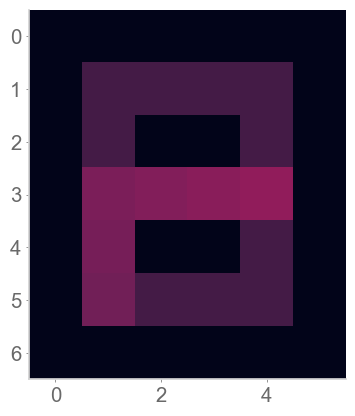

tensor([8.2215, 6.0798, 5.7496, 5.3458])


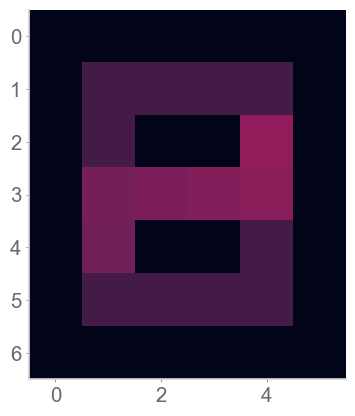

Left reward
tensor([4.9141, 5.6812, 5.8774, 4.9041])


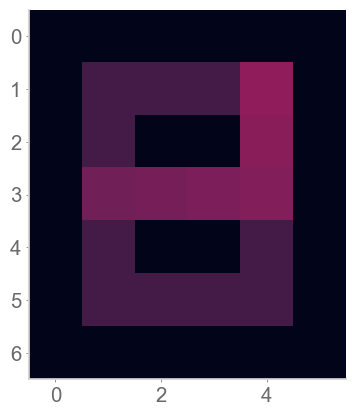

tensor([5.0774, 4.9837, 6.7883, 5.5513])


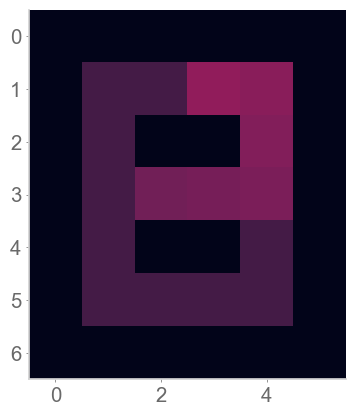

tensor([5.6913, 5.7594, 7.3883, 6.2998])


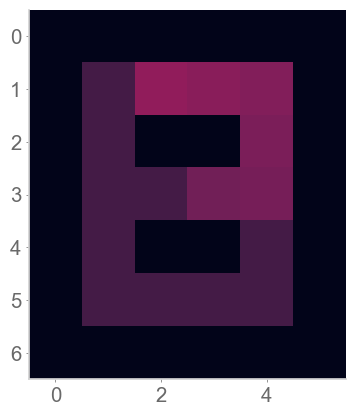

tensor([5.7420, 7.7425, 6.0347, 5.9685])


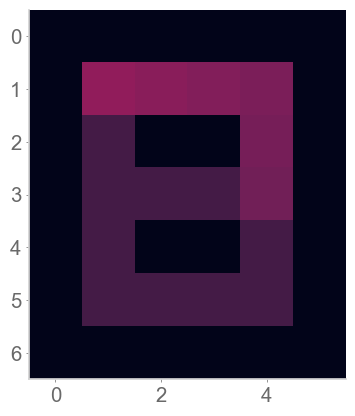

tensor([7.2992, 9.0040, 7.1879, 7.0546])


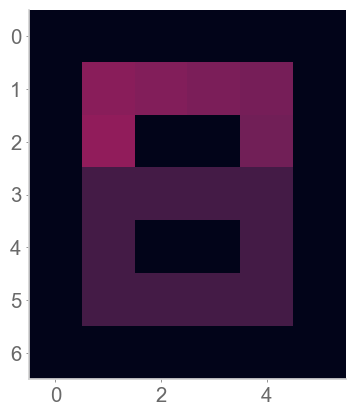

Reset reward
tensor([3.1234, 3.1475, 3.1600, 6.8984])


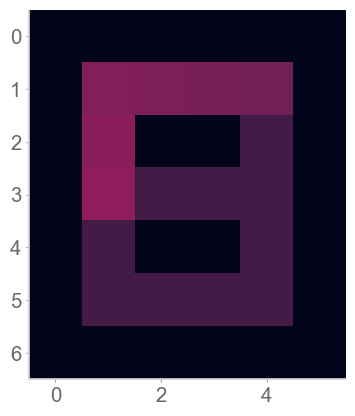

tensor([4.1563, 4.1563, 4.6304, 6.7753])


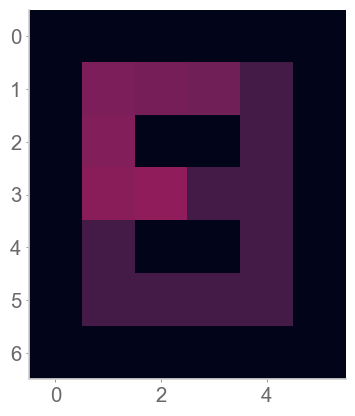

tensor([4.2581, 4.1786, 4.7317, 7.8234])


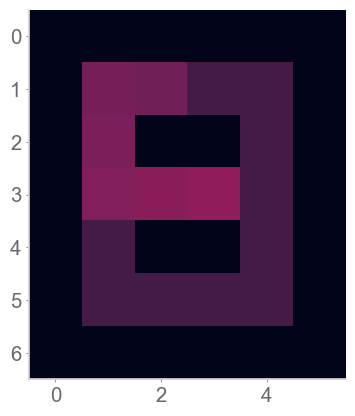

tensor([6.0802, 8.8742, 5.2470, 5.3141])


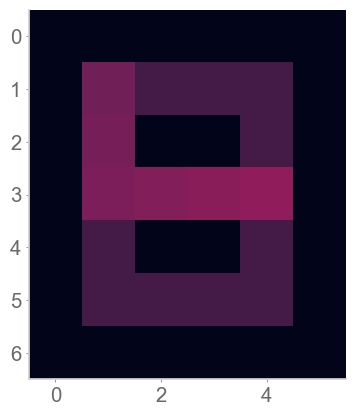

tensor([ 6.4417, 10.8409,  6.7730,  6.8995])


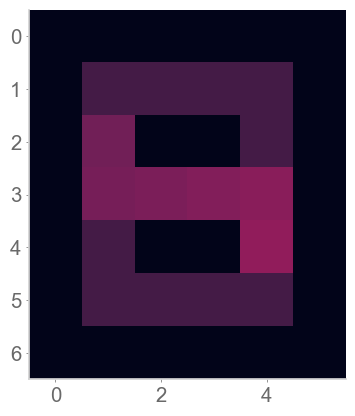

Right reward
tensor([5.3607, 4.9912, 6.4333, 5.2737])


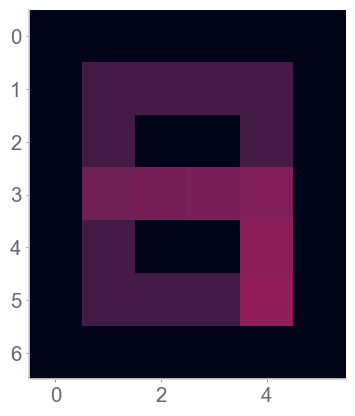

tensor([5.1568, 5.2613, 6.6325, 6.0556])


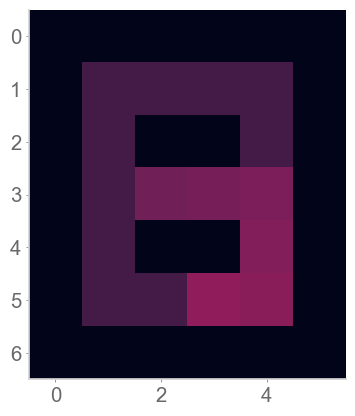

tensor([5.7495, 5.5316, 7.9015, 6.1322])


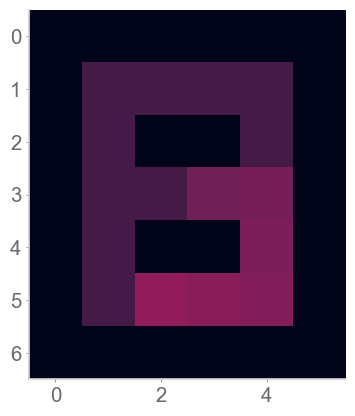

tensor([8.5263, 6.2481, 6.5372, 6.1683])


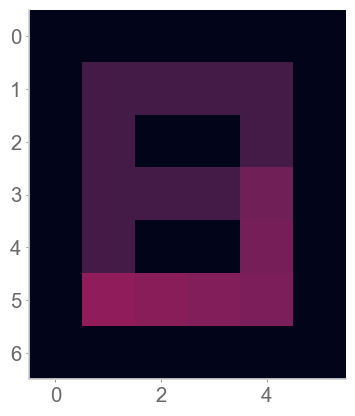

tensor([10.1136,  7.3704,  7.4804,  7.4879])


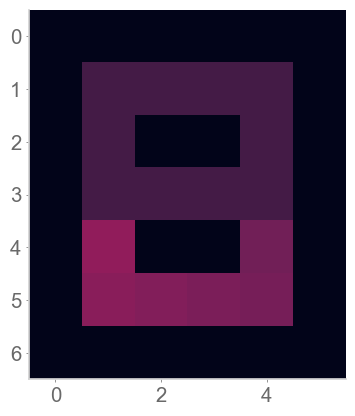

Reset reward
tensor([3.2228, 3.2846, 3.3150, 6.5649])


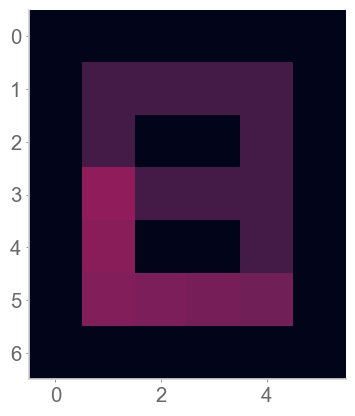

tensor([4.1253, 4.1392, 4.5059, 6.7511])


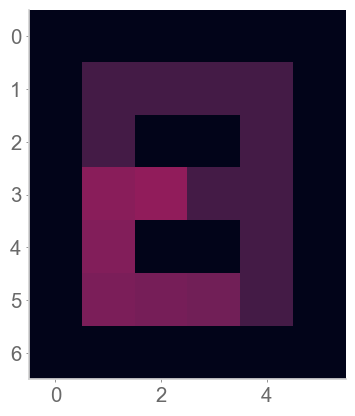

tensor([4.2524, 4.2529, 4.7307, 7.5014])


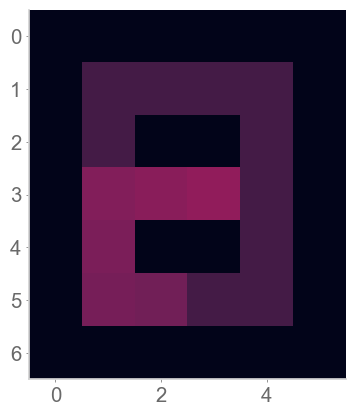

tensor([7.4335, 6.4867, 5.1881, 4.9271])


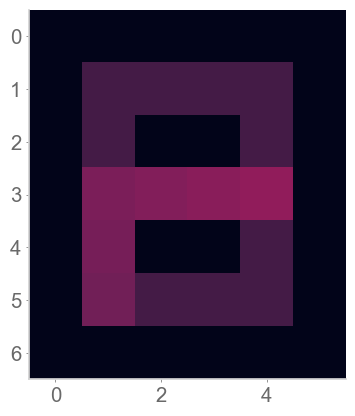

tensor([8.2215, 6.0798, 5.7496, 5.3458])


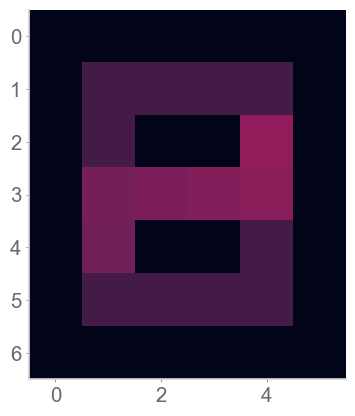

Left reward
tensor([4.9141, 5.6812, 5.8774, 4.9041])


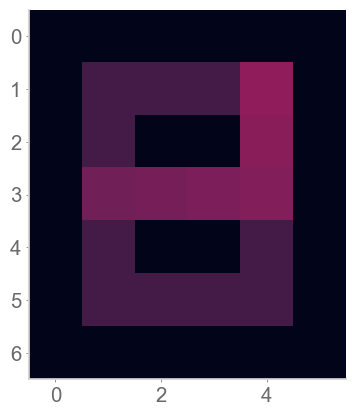

tensor([5.0774, 4.9837, 6.7883, 5.5513])


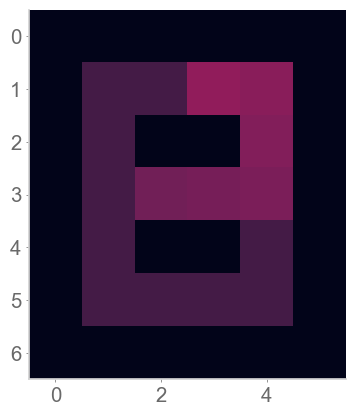

tensor([5.6913, 5.7594, 7.3883, 6.2998])


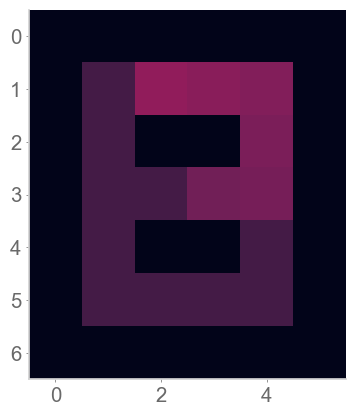

tensor([5.7420, 7.7425, 6.0347, 5.9685])


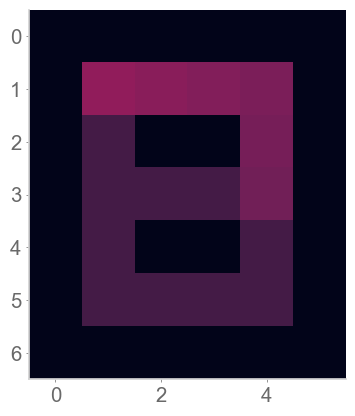

tensor([7.2992, 9.0040, 7.1879, 7.0546])


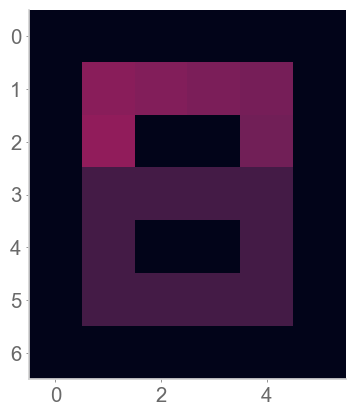

Reset reward
[EVAL] 90.0 score over 100.0 steps.


In [15]:
%matplotlib inline
score, steps_per_episode = run_eval_episode(env, agent, 1, verbose=True, max_episode_steps=100)

# Poort Task

In [ ]:
from auxrl.environments.PoortTask import Env as Env 

In [ ]:
dim = 24
nn_yaml = 'dm'
base_exp = 'poorttask'
model = 'noq_g0_-1_entro-2'
_iter = 0
epoch = 200
exp = f'{base_exp}_{nn_yaml}_dim{dim}'
fname = f'{base_exp}_{model}'

In [ ]:
fname_nnet_dir = f'{engram_dir}nnets/{exp}/{fname}_{_iter}/'

In [ ]:
with open(f'{engram_dir}params/{exp}/{fname}.yaml', 'r') as f:
    parameters = yaml.safe_load(f)

In [ ]:
parameters['fname'] = f'{exp}/{fname}_{_iter}'
parameters['internal_dim'] = dim
parameters['nn_yaml'] = nn_yaml

In [ ]:
env = Env(**parameters['dset_args'])

In [ ]:
env_spec = specs.make_environment_spec(env)
network = Network(env_spec, device=device, **parameters['network_args'])
agent = Agent(env_spec, network, device=device, **parameters['agent_args'])

In [ ]:
agent.load_network(fname_nnet_dir, episode=epoch, encoder_only=False)

In [ ]:
max_episode_steps = 20
timestep = env.reset()
episode_steps = 0
episode_return = 0
trial_type = 'VERTICAL' if env.trial_type == 1 else 'ANGLED'
print(trial_type)
while not timestep.last():
    curr_state = env.curr_state
    action = agent.select_action(timestep.observation, force_greedy=True)
    timestep = env.step(action)
    action = action.item()
    if action == 2: action_name = 'Lick'
    elif action == 0: action_name = 'Forward'
    else: action_name = 'Backward'
    print(f'{curr_state}, {action_name}')
    episode_steps += 1
    episode_return += timestep.reward
    if (max_episode_steps != None) and (episode_steps >= max_episode_steps):
                break
print(f'Return: {episode_return}')